In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

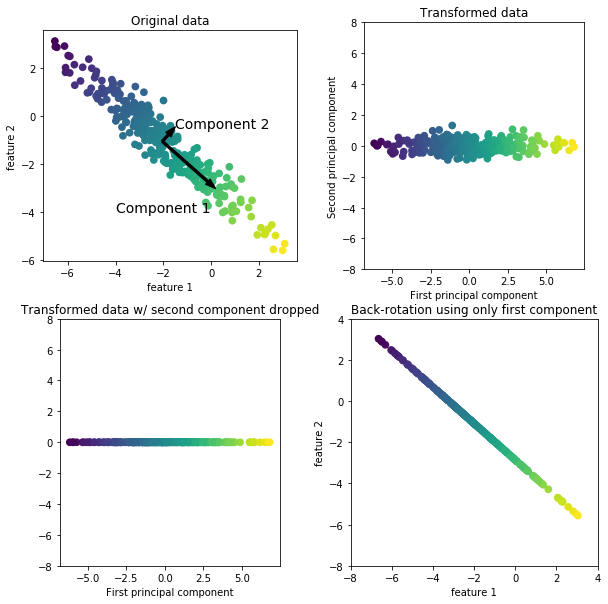

In [2]:
mglearn.plots.plot_pca_illustration()

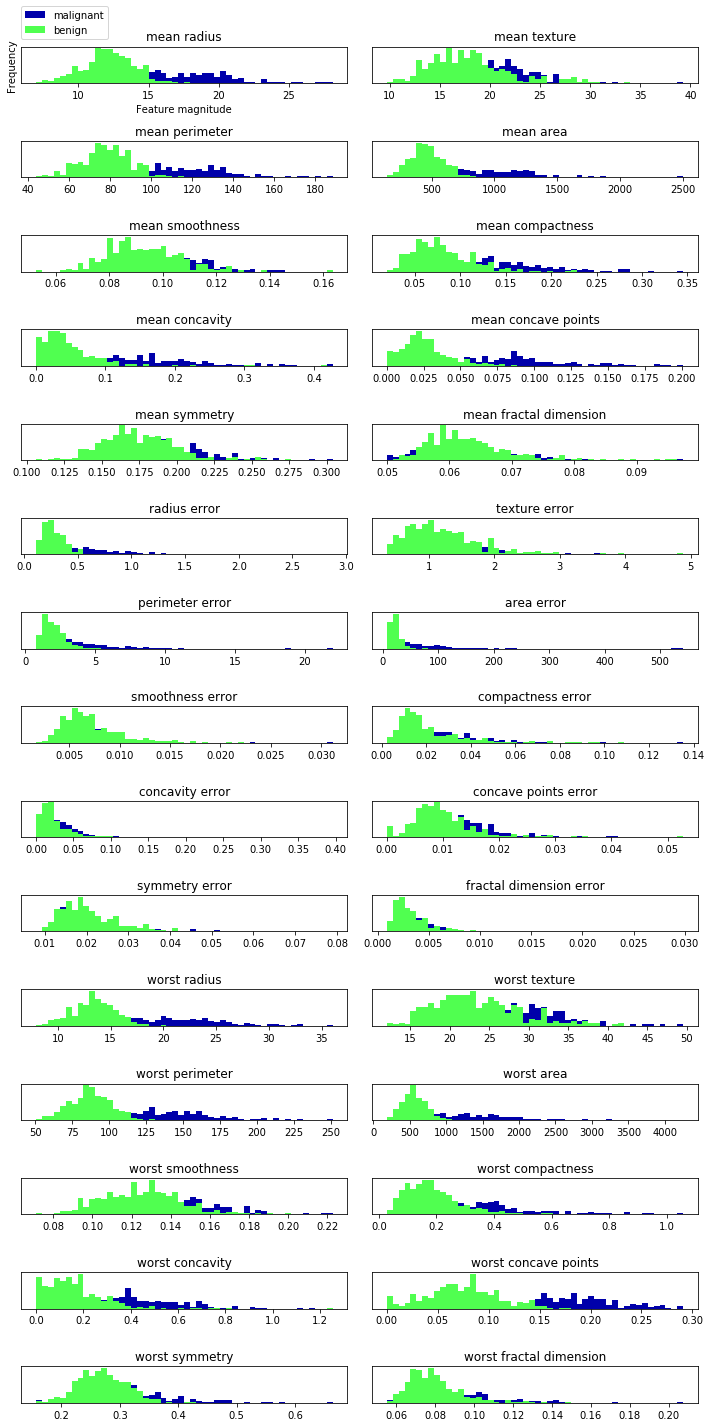

In [3]:
# 显示每个特征的评率分布直方图
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0))
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2))
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc=(0, 1.2))
fig.tight_layout()

In [4]:
# 缩放数据，使每个特征的方差都为1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)

X_scaled = scaler.transform(cancer.data)

In [5]:
# 进行PCA处理
from sklearn.decomposition import PCA

# 保留数据的前两个主成分
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

print(X_scaled.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


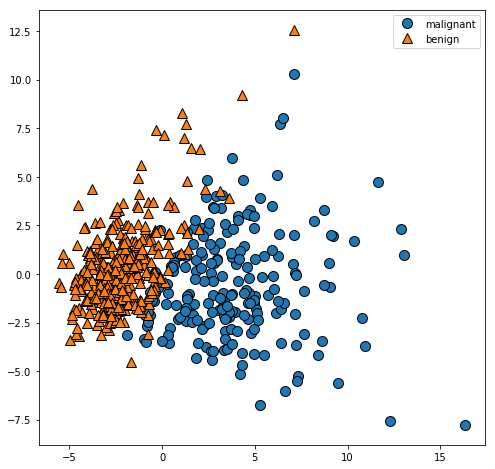

In [6]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc=1)

In [7]:
print(pca.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0,0.5,'Principal components')

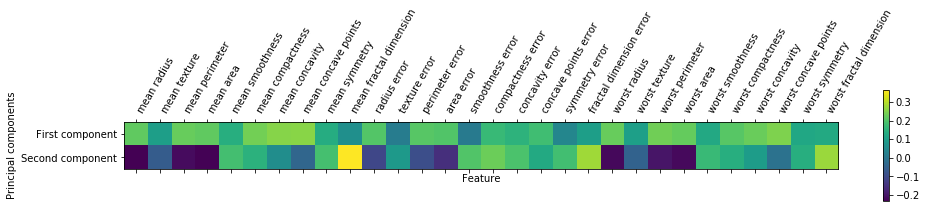

In [8]:
# 利用热力图可视化系数

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [9]:
# 利用PCA提取图像特征
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

print(image_shape)

(87, 65)


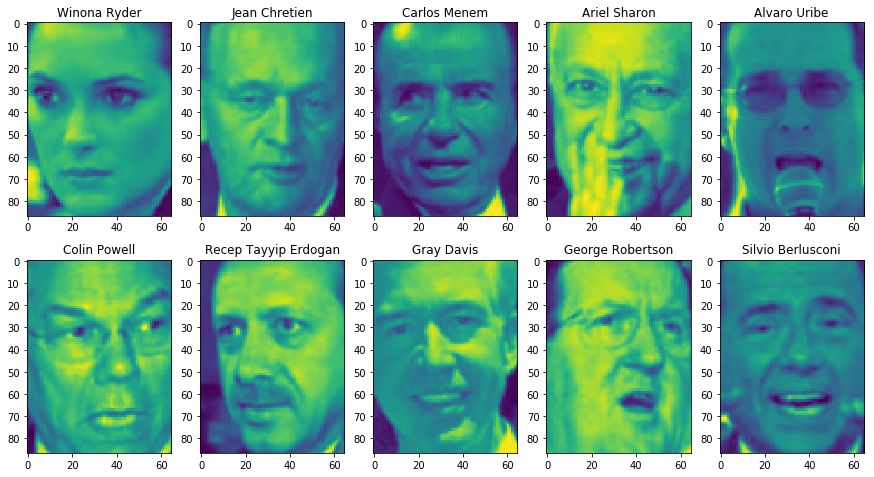

In [13]:
fix, axes = plt.subplots(2, 5, figsize=(15, 8))

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [11]:
# 计算每个目标出现的次数
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='\t\t\t')
    if (i + 1) % 2 == 0:
        print()

Alejandro Toledo           39			Alvaro Uribe               35			
Amelie Mauresmo            21			Andre Agassi               36			
Angelina Jolie             20			Ariel Sharon               77			
Arnold Schwarzenegger      42			Atal Bihari Vajpayee       24			
Bill Clinton               29			Carlos Menem               21			
Colin Powell              236			David Beckham              31			
Donald Rumsfeld           121			George Robertson           22			
George W Bush             530			Gerhard Schroeder         109			
Gloria Macapagal Arroyo    44			Gray Davis                 26			
Guillermo Coria            30			Hamid Karzai               22			
Hans Blix                  39			Hugo Chavez                71			
Igor Ivanov                20			Jack Straw                 28			
Jacques Chirac             52			Jean Chretien              55			
Jennifer Aniston           21			Jennifer Capriati          42			
Jennifer Lopez             21			Jeremy Greenstock          24			
Jiang Zemin              

In [28]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# 将灰度值缩放到0到1之间， 而不是在0到255之间
# 以得到更好的数据稳定性
X_people = X_people / 255.0

[[0.22352941 0.23660131 0.30588236 ... 0.06797386 0.06535947 0.08888888]
 [0.2614379  0.31633985 0.3477124  ... 0.03398693 0.03267974 0.03660131]
 [0.07320261 0.05620915 0.05882353 ... 0.08888888 0.08888888 0.10065359]
 ...
 [0.14248365 0.0875817  0.10980392 ... 0.05620915 0.02614379 0.02091503]
 [0.21176471 0.25620916 0.22091503 ... 0.82222223 0.8235294  0.8326797 ]
 [0.43398693 0.50326794 0.5699346  ... 0.05490196 0.05490196 0.05359477]]


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=0)
# 使用一个邻居构建KNN模型
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

1.0


0.28294573643410853


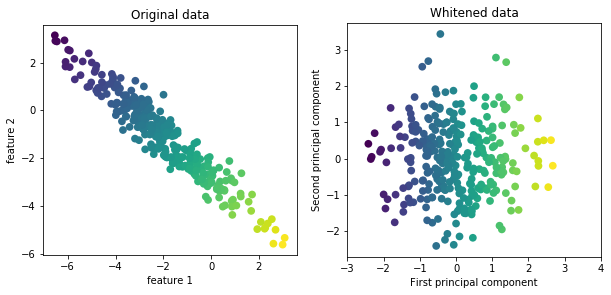

In [30]:
mglearn.plots.plot_pca_whitening()

In [31]:
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)

(1547, 100)


In [35]:
knn_new = KNeighborsClassifier(n_neighbors=1)
knn_new.fit(X_train_pca, y_train)

print(knn_new.score(X_train_pca, y_train))
print(knn_new.score(X_test_pca, y_test))

1.0
0.32751937984496127
